# US Name
Estimate SO2 emission as a function of  period and others variables


# Description

Replicate table 1
Replicate table 2
Replicate table 3
Replicate table 4

## Variables
### Target

SO2 emission

### Features

period
credit constraint
polluted_sector

## Complementary information



# Metadata

- Key: 168_Pollution_and_Credit_Constraint
- Epic: Models
- US: replicate previous tables
- Task tag: #data-analysis
- Analytics reports: 

# Input Cloud Storage

## Table/file

**Name**

- https://github.com/thomaspernet/pollution_credit_constraint/blob/master/01_data_preprocessing/02_transform_tables/00_credit_constraint_industry.md

**Github**

- fin_dep_pollution_baseline_industry



# Connexion server

In [1]:
from awsPy.aws_authorization import aws_connector
from awsPy.aws_s3 import service_s3
from awsPy.aws_glue import service_glue
from pathlib import Path
import pandas as pd
import numpy as np
#import seaborn as sns
import os, shutil, json
import sys

path = os.getcwd()
parent_path = str(Path(path).parent.parent.parent)


name_credential = 'financial_dep_SO2_accessKeys.csv'
region = 'eu-west-3'
bucket = 'datalake-datascience'
path_cred = "{0}/creds/{1}".format(parent_path, name_credential)

In [2]:
con = aws_connector.aws_instantiate(credential = path_cred,
                                       region = region)
client= con.client_boto()
s3 = service_s3.connect_S3(client = client,
                      bucket = bucket, verbose = False)
glue = service_glue.connect_glue(client = client) 

In [3]:
pandas_setting = True
if pandas_setting:
    #cm = sns.light_palette("green", as_cmap=True)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)

In [4]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'


# Load tables

Since we load the data as a Pandas DataFrame, we want to pass the `dtypes`. We load the schema from Glue to guess the types

In [5]:
db = 'environment'
table = 'fin_dep_pollution_baseline_industry'

In [6]:
dtypes = {}
schema = (glue.get_table_information(database = db,
                           table = table)
          ['Table']['StorageDescriptor']['Columns']
         )
for key, value in enumerate(schema):
    if value['Type'] in ['varchar(12)',
                         'varchar(3)',
                        'varchar(14)', 'varchar(11)']:
        format_ = 'string'
    elif value['Type'] in ['decimal(21,5)', 'double', 'bigint', 'int', 'float']:
        format_ = 'float'
    else:
        format_ = value['Type'] 
    dtypes.update(
        {value['Name']:format_}
    )

In [7]:
download_data = False
filename = 'df_{}'.format(table)
full_path_filename = 'SQL_OUTPUT_ATHENA/CSV/{}.csv'.format(filename)
path_local = os.path.join(str(Path(path).parent.parent.parent), 
                              "00_data_catalog/temporary_local_data")
df_path = os.path.join(path_local, filename + '.csv')
if download_data:
    
    s3 = service_s3.connect_S3(client = client,
                          bucket = bucket, verbose = False)
    query = """
    SELECT * 
    FROM {}.{}
    WHERE so2_intensity > 0
    """.format(db, table)
    try:
        df = (s3.run_query(
            query=query,
            database=db,
            s3_output='SQL_OUTPUT_ATHENA',
            filename=filename,  # Add filename to print dataframe
            destination_key='SQL_OUTPUT_ATHENA/CSV',  #Use it temporarily
            dtype = dtypes
        )
                )
    except:
        pass
    s3.download_file(
        key = full_path_filename
    )
    shutil.move(
        filename + '.csv',
        os.path.join(path_local, filename + '.csv')
    )
    s3.remove_file(full_path_filename)
    df.head()

In [8]:
pd.DataFrame(schema)

,Name,Type,Comment
0,year,string,year from 2001 to 2007
1,period,varchar(5),"False if year before 2005 included, True if year 2006 and 2007"
2,province_en,string,
3,cityen,string,
4,geocode4_corr,string,
...,...,...,...
79,dominated_sales_for_i,"map<double,boolean>","map with information on foreign dominated industry knowing percentile .5, .75, .9, .95 of sales"
80,dominated_capital_for_i,"map<double,boolean>","map with information on foreign dominated industry knowing percentile .5, .75, .9, .95 of capital"
81,fe_c_i,bigint,City industry fixed effect
82,fe_t_i,bigint,year industry fixed effect


## Schema Latex table

To rename a variable, please use the following template:

```
{
    'old':'XX',
    'new':'XX_1'
    }
```

if you need to pass a latex format with `\`, you need to duplicate it for instance, `\text` becomes `\\text:

```
{
    'old':'working\_capital\_i',
    'new':'\\text{working capital}_i'
    }
```

Then add it to the key `to_rename`

In [9]:
add_to_dic = True
if add_to_dic:
    if os.path.exists("schema_table.json"):
        os.remove("schema_table.json")
    data = {'to_rename':[], 'to_remove':[]}
    dic_rename =  [
        {
        'old':'periodTRUE',
        'new':'\\text{period}'
        },
        
        ### depd
        ###mandate
        {
        'old':'tso2\_mandate\_c',
        'new':'\\text{S02 mandate}_c'
        },
        ### financial ratio
        {
        'old':'total\_asset',
        'new':'\\text{total asset}'
        },
        {
        'old':'tangible',
        'new':'\\text{tangible asset}'
        },
        {
        'old':'investment\_tot\_asset',
        'new':'\\text{investment to asset}'
        },
        {
        'old':'rd\_tot\_asset',
        'new':'\\text{rd to asset}'
        },
        {
        'old':'asset\_tangibility\_tot\_asset',
        'new':'\\text{asset tangibility}'
        },
        {
        'old':'d\_avg\_ij\_o\_city\_mandate',
        'new':'\\text{relative reduction mandate}_c'
        },
        ### ind
        {
        'old':'current\_ratio',
        'new':'\\text{current ratio}'
        },
        {
        'old':'lag\_current\_ratio',
        'new':'\\text{current ratio}'
        },
        {
        'old':'quick\_ratio',
        'new':'\\text{quick ratio}'
        },
        {
        'old':'lag\_liabilities\_tot\_asset',
        'new':'\\text{liabilities to asset}'
        },
        {
        'old':'liabilities\_tot\_asset',
        'new':'\\text{liabilities to asset}'
        },
        {
        'old':'sales\_tot\_asset',
        'new':'\\text{sales to asset}'
        },
        {
        'old':'lag\_sales\_tot\_asset',
        'new':'\\text{sales to asset}'
        },
        {
        'old':'cash\_tot\_asset',
        'new':'\\text{cash to asset}'
        },
        {
        'old':'cashflow\_tot\_asset',
        'new':'\\text{cashflow to asset}'
        },
        {
        'old':'cashflow\_to\_tangible',
        'new':'\\text{cashflow}'
        },
        {
        'old':'lag\_cashflow\_to\_tangible',
        'new':'\\text{cashflow}'
        },
        {
        'old':'d\_credit\_constraintBELOW',
        'new':'\\text{Fin dep}_{i}'
        },
        ## control
        {
        'old':'age + 1',
        'new':'\\text{age}'
        },
        {
        'old':'export\_to\_sale',
        'new':'\\text{export to sale}'
        },
        {
        'old':'labor\_capital',
        'new':'\\text{labor to capital}'
        },
        ### Supply demand external finance
        {
        'old':'supply\_all\_credit',
        'new':'\\text{all credit}'
        },
        {
        'old':'supply\_long\_term\_credit',
        'new':'\\text{long term credit}'
        },
        {
        'old':'credit\_constraint',
        'new':'\\text{credit demand}'
        },
        {
        'old':'soe\_vs\_priPRIVATE',
        'new':'\\text{private}'
        },
        ## TFP
        {
        'old':'tfp\_cit',
        'new':'\\text{TFP}'
        },
        ### year
        {
        'old':'year2002',
        'new':'\\text{2002}'
        },
        {
        'old':'year2003',
        'new':'\\text{2003}'
        },
        {
        'old':'year2004',
        'new':'\\text{2004}'
        },
        {
        'old':'year2005',
        'new':'\\text{2005}'
        },
        {
        'old':'year2006',
        'new':'\\text{2006}'
        },
        {
        'old':'year2007',
        'new':'\\text{2007}'
        },
        
        
    ]
    

    data['to_rename'].extend(dic_rename)
    with open('schema_table.json', 'w') as outfile:
        json.dump(data, outfile)

In [10]:
sys.path.append(os.path.join(parent_path, 'utils'))
import latex.latex_beautify as lb
#%load_ext autoreload
#%autoreload 2

In [11]:
options(warn=-1)
library(tidyverse)
library(lfe)
#library(lazyeval)
library('progress')
path = "../../../utils/latex/table_golatex.R"
source(path)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [12]:
%get df_path
df_final <- read_csv(df_path) %>%
mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("fe")), as.factor) %>%
mutate(
    year = relevel(as.factor(year), ref='2001'),
    period = relevel(as.factor(period), ref='FALSE'),
    polluted_d50i = relevel(as.factor(polluted_d50i), ref='BELOW'),
    polluted_d75i = relevel(as.factor(polluted_d75i), ref='BELOW'),
    polluted_d80i = relevel(as.factor(polluted_d80i), ref='BELOW'),
    polluted_d85i = relevel(as.factor(polluted_d85i), ref='BELOW'),
    polluted_d90i = relevel(as.factor(polluted_d90i), ref='BELOW'),
    polluted_d95i = relevel(as.factor(polluted_d95i), ref='BELOW'),
    polluted_mi = relevel(as.factor(polluted_mi), ref='BELOW'),
    d_avg_ij_o_city_mandate = relevel(as.factor(d_avg_ij_o_city_mandate), ref="FALSE"),
)

Parsed with column specification:
cols(
  .default = col_double(),
  period = col_logical(),
  province_en = col_character(),
  cityen = col_character(),
  short = col_character(),
  polluted_d50i = col_character(),
  polluted_d75i = col_character(),
  polluted_d80i = col_character(),
  polluted_d85i = col_character(),
  polluted_d90i = col_character(),
  polluted_d95i = col_character(),
  polluted_mi = col_character(),
  polluted_d50_cit = col_character(),
  polluted_d75_cit = col_character(),
  polluted_d80_cit = col_character(),
  polluted_d85_cit = col_character(),
  polluted_d90_cit = col_character(),
  polluted_d95_cit = col_character(),
  polluted_m_cit = col_character(),
  above_threshold_mandate = col_character(),
  above_average_mandate = col_character()
  # ... with 24 more columns
)
See spec(...) for full column specifications.


## Table 1:Baseline

$$
\begin{aligned}
\text{Write your equation}
\end{aligned}
$$


* Column 1: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`
* Column 2: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`
* Column 3: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`
* Column 4: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`

In [13]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [14]:
%get path table
to_remove <- c(21, 42, 23, 39, 33, 26, 32, 31)
t_0 <- felm(log(tso2) ~ credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr + ind2, df_final,
            exactDOF = TRUE)

t_1 <- felm(log(tso2) ~ 
            credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>%filter(!(ind2 %in% to_remove)),
            exactDOF = TRUE)

t_2 <- felm(log(so2_intensity) ~ 
            credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final,
            exactDOF = TRUE)

t_3 <- felm(log(so2_intensity) ~ 
             credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>%filter(!(ind2 %in% to_remove)),
            exactDOF = TRUE)
            
dep <- "Dependent variable: SO2 emission"
fe1 <- list(
    c("City-industry", "Yes", "Yes", "Yes", "Yes"),
    c("Time-industry", "Yes", "Yes", "Yes", "Yes"),
    c("City-Time", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0,t_1, t_2, t_3
),
    title="SO2 emission reduction, credit constraint and policy mandate",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
)

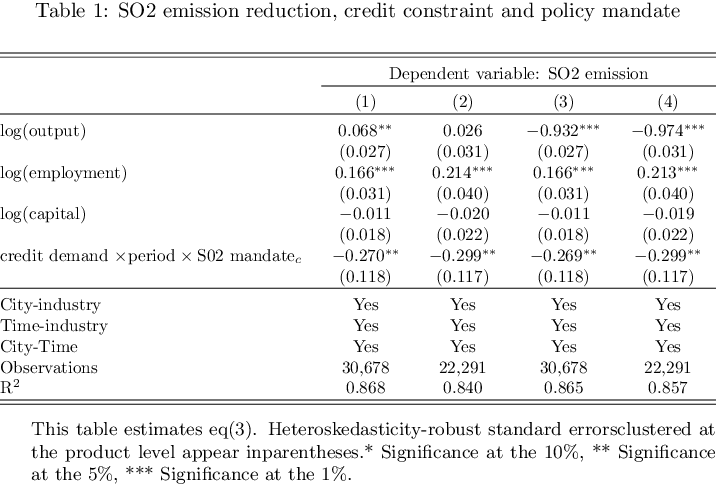

In [15]:
tbe1  = "This table estimates eq(3). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the product level appear inparentheses."\
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

#multi_lines_dep = '(city/product/trade regime/year)'
#new_r = ['& test1', 'test2']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 150,
            folder = folder)

## Table 2:Parallel trend

$$
\begin{aligned}
\text{Write your equation}
\end{aligned}
$$


* Column 1: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`
* Column 2: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`
* Column 3: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`
* Column 4: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`

In [16]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [17]:
%get path table
t_0 <- felm(log(tso2) ~ credit_constraint * year * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final ,
            exactDOF = TRUE)

t_1 <- felm(log(so2_intensity) ~ 
            credit_constraint * year * tso2_mandate_c +
            log(output) + log(employment) + log(capital) 
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final,
            exactDOF = TRUE)

dep <- "Dependent variable: SO2 emission"
fe1 <- list(
    c("City-industry", "Yes", "Yes"),
    c("Time-industry", "Yes", "Yes"),
    c("City-Time", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0,t_1
),
    title="parallel trend",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
)

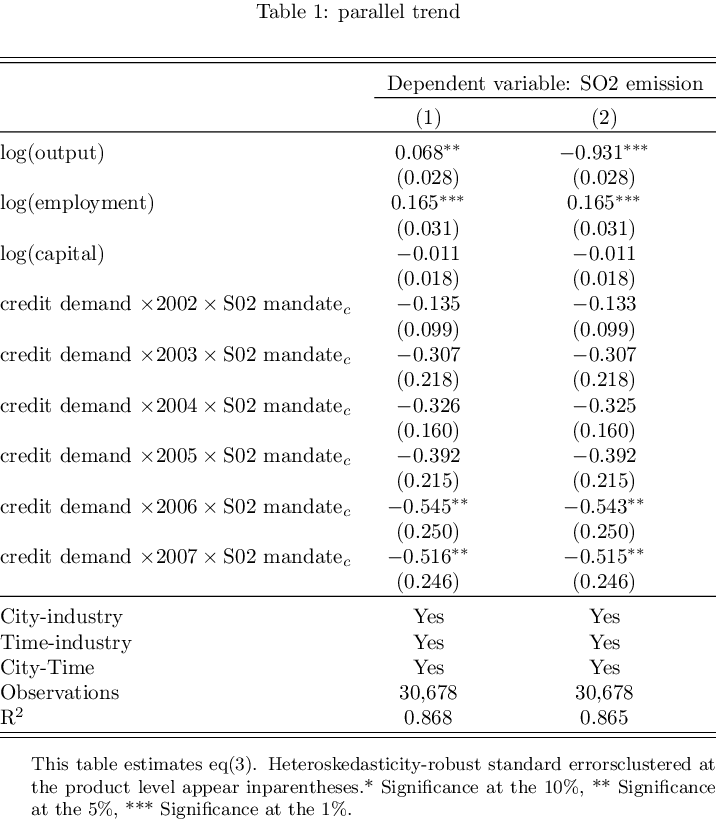

In [18]:
tbe1  = "This table estimates eq(3). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the product level appear inparentheses."\
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

#multi_lines_dep = '(city/product/trade regime/year)'
#new_r = ['& test1', 'test2']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 150,
            folder = folder,
           parallel = True)

## Table 3:heterogeneity

$$
\begin{aligned}
\text{Write your equation}
\end{aligned}
$$


* Column 1: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`
* Column 2: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`
* Column 3: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`
* Column 4: XXX
    * FE: 
        - fe 1: `XX`
        - fe 2: `XX`
        - fe 3: `XX`

### SO2

In [19]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [20]:
%get path table
### SOE vs Private
t_0 <- felm(log(tso2) ~ credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(dominated_output_soe_c == TRUE),
            exactDOF = TRUE)

t_1 <- felm(log(tso2) ~ 
            credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(dominated_output_soe_c == FALSE),
            exactDOF = TRUE)

### Domestic vs foreign
t_2 <- felm(log(tso2) ~ credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(dominated_output_for_c == TRUE),
            exactDOF = TRUE)

t_3 <- felm(log(tso2) ~ 
            credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(dominated_output_for_c == FALSE),
            exactDOF = TRUE)

### Large vs Small 
#### .5
var <- .75
df_temp_true = df_final %>% 
    mutate(filter_ = str_extract(dominated_output_i, paste0("(?<=", var, "\\=)(.*?)(?=\\,)")))%>%
    filter(filter_ == 'false') ### fix do not change
df_temp_false = df_final %>% 
    mutate(filter_ = str_extract(dominated_output_i, paste0("(?<=", var, "\\=)(.*?)(?=\\,)"))) %>%
    filter(filter_ == 'true') ### fix do not change

t_4 <- felm(log(tso2) ~ credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 |geocode4_corr + ind2, df_temp_true %>% filter(
                so2_intensity >0 ),
            exactDOF = TRUE)

t_5 <- felm(log(tso2) ~ 
            credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 |geocode4_corr + ind2, df_temp_false %>% filter(
               so2_intensity >0 ),
            exactDOF = TRUE)

dep <- "Dependent variable: SO2 emission"
fe1 <- list(
    c("City-industry", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Time-industry", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("City-Time", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0,t_1, t_2,t_3, t_4, t_5
),
    title="heterogeneity effect",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
)

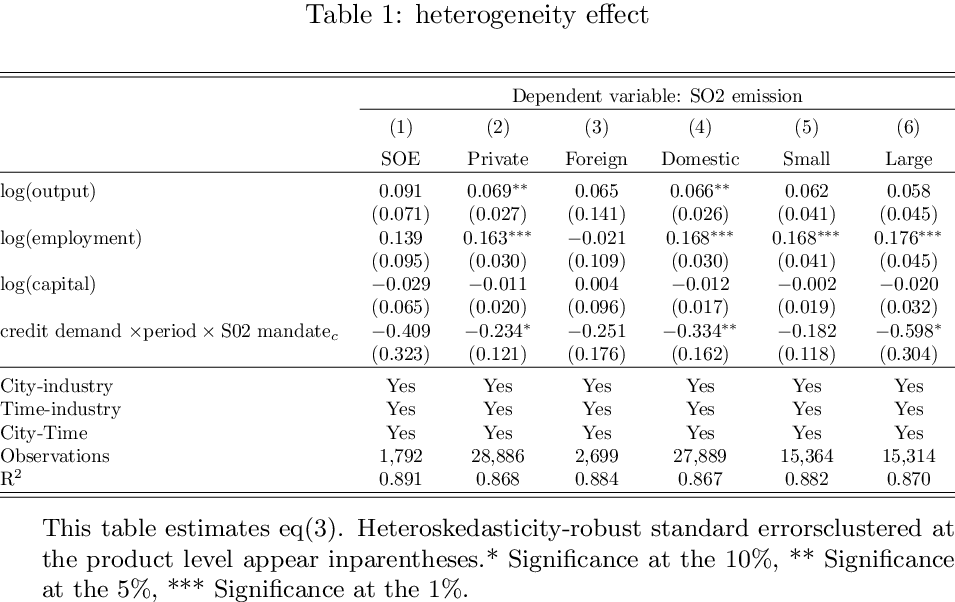

In [21]:
tbe1  = "This table estimates eq(3). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the product level appear inparentheses."\
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

#multi_lines_dep = '(city/product/trade regime/year)'
new_r = ['& SOE', 'Private', 'Foreign', 'Domestic', 'Small', 'Large']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 200,
            folder = folder)

### SO2 intensity

In [22]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [23]:
%get path table
### SOE vs Private
t_0 <- felm(log(so2_intensity) ~ credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(dominated_output_soe_c == TRUE),
            exactDOF = TRUE)

t_1 <- felm(log(so2_intensity) ~ 
            credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(dominated_output_soe_c == FALSE),
            exactDOF = TRUE)

### Domestic vs foreign
t_2 <- felm(log(so2_intensity) ~ credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(dominated_output_for_c == TRUE),
            exactDOF = TRUE)

t_3 <- felm(log(so2_intensity) ~ 
            credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(dominated_output_for_c == FALSE),
            exactDOF = TRUE)

### Large vs Small 
#### .5
var <- .75
df_temp_true = df_final %>% 
    mutate(filter_ = str_extract(dominated_output_i, paste0("(?<=", var, "\\=)(.*?)(?=\\,)")))%>%
    filter(filter_ == 'false') ### fix do not change
df_temp_false = df_final %>% 
    mutate(filter_ = str_extract(dominated_output_i, paste0("(?<=", var, "\\=)(.*?)(?=\\,)"))) %>%
    filter(filter_ == 'true') ### fix do not change

t_4 <- felm(log(so2_intensity) ~ credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_temp_true,
            exactDOF = TRUE)

t_5 <- felm(log(so2_intensity) ~ 
            credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_temp_false ,
            exactDOF = TRUE)

dep <- "Dependent variable: SO2 emission"
fe1 <- list(
    c("City-industry", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Time-industry", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("City-Time", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0,t_1, t_2,t_3, t_4, t_5
),
    title="heterogeneity effect",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
)

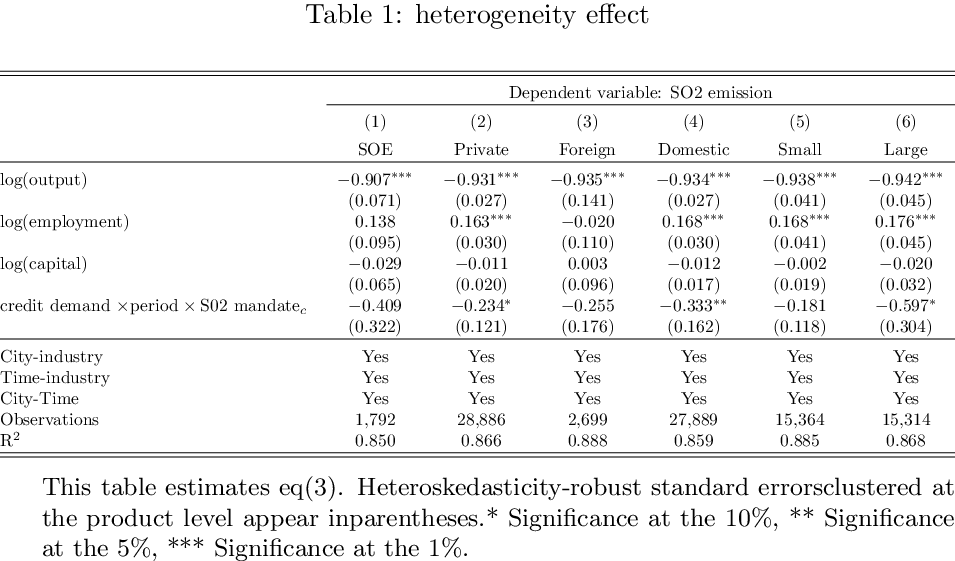

In [24]:
tbe1  = "This table estimates eq(3). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the product level appear inparentheses."\
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

#multi_lines_dep = '(city/product/trade regime/year)'
new_r = ['& SOE', 'Private', 'Foreign', 'Domestic', 'Small', 'Large']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 200,
            folder = folder)

## Policy

In [25]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [26]:
%get path table
### SOE vs Private
t_0 <- felm(log(tso2) ~ credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(tcz == 1),
            exactDOF = TRUE)

t_1 <- felm(log(tso2) ~ 
            credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter( tcz == 0),
            exactDOF = TRUE)

### Domestic vs foreign
t_2 <- felm(log(tso2) ~ credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(spz == 1),
            exactDOF = TRUE)

t_3 <- felm(log(tso2) ~ 
            credit_constraint * period * tso2_mandate_c +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final %>% filter(spz == 0),
            exactDOF = TRUE)
dep <- "Dependent variable: SO2 emission"
fe1 <- list(
    c("City-industry", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Time-industry", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("City-Time", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0,t_1, t_2,t_3
),
    title="heterogeneity effect",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
)

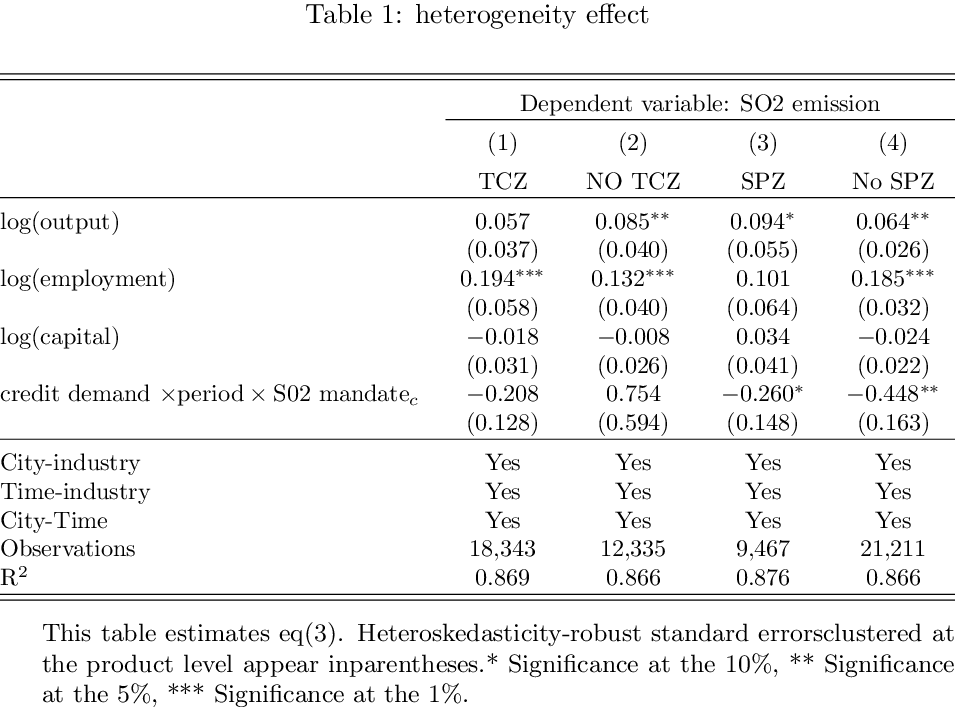

In [27]:
tbe1  = "This table estimates eq(3). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the product level appear inparentheses."\
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

#multi_lines_dep = '(city/product/trade regime/year)'
new_r = ['& TCZ', 'NO TCZ', 'SPZ', 'No SPZ']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 200,
            folder = folder)

## Table 4: Relocation

In [28]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [29]:
%get path table
### SOE vs Private
t_0 <- felm(log(tso2) ~ credit_constraint * period * tso2_mandate_c +
            credit_constraint * period * d_avg_ij_o_city_mandate +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final ,
            exactDOF = TRUE)

### Domestic vs foreign
t_1 <- felm(log(so2_intensity) ~ credit_constraint * period * tso2_mandate_c +
            credit_constraint * period * d_avg_ij_o_city_mandate +
            log(output) + log(employment) + log(capital)
            | fe_c_i + fe_t_i + fe_c_t |0 | geocode4_corr+ ind2, df_final,
            exactDOF = TRUE)

dep <- "Dependent variable: SO2 emission"
fe1 <- list(
    c("City-industry", "Yes", "Yes"),
    c("Time-industry", "Yes", "Yes"),
    c("City-Time", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0,t_1
),
    title="heterogeneity effect",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
)

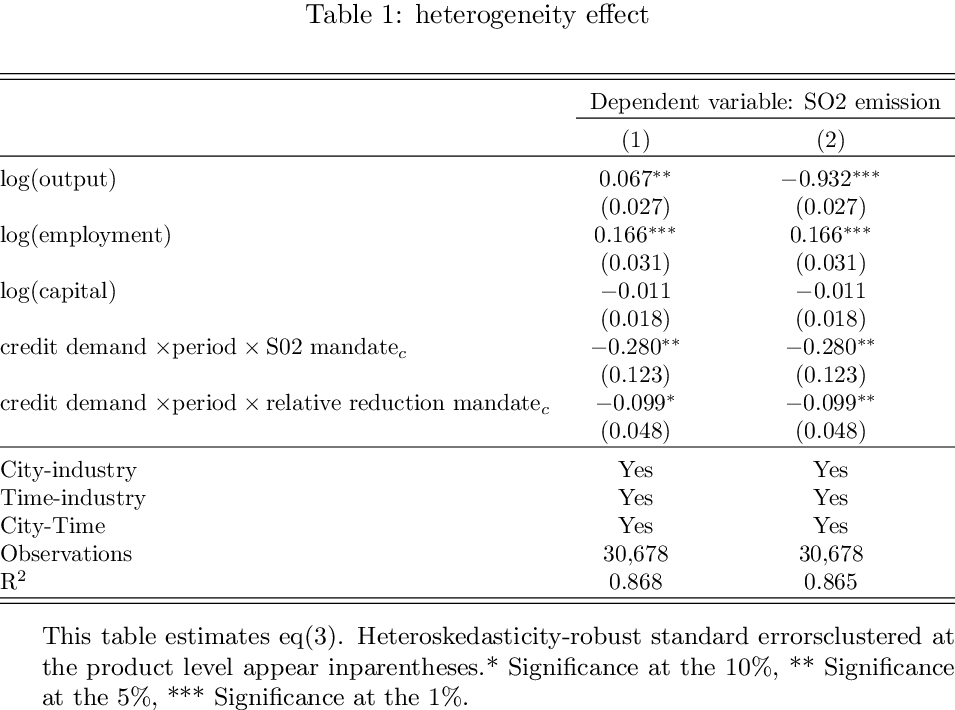

In [30]:
tbe1  = "This table estimates eq(3). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the product level appear inparentheses."\
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

#multi_lines_dep = '(city/product/trade regime/year)'
#new_r = ['& TCZ', 'NO TCZ', 'SPZ', 'No SPZ']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 200,
            folder = folder)

# Generate reports

In [31]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [32]:
import os, time, shutil, urllib, ipykernel, json
from pathlib import Path
from notebook import notebookapp
import sys
path = os.getcwd()
parent_path = str(Path(path).parent.parent.parent)
sys.path.append(os.path.join(parent_path, 'utils'))
import make_toc

In [33]:
name_json = 'parameters_ETL_pollution_credit_constraint.json'
path_json = os.path.join(str(Path(path).parent.parent), 'utils',name_json)

In [34]:
def create_report(extension = "html", keep_code = False, notebookname = None):
    """
    Create a report from the current notebook and save it in the 
    Report folder (Parent-> child directory)
    
    1. Exctract the current notbook name
    2. Convert the Notebook 
    3. Move the newly created report
    
    Args:
    extension: string. Can be "html", "pdf", "md"
    
    
    """
    
    ### Get notebook name
    connection_file = os.path.basename(ipykernel.get_connection_file())
    kernel_id = connection_file.split('-', 1)[0].split('.')[0]

    for srv in notebookapp.list_running_servers():
        try:
            if srv['token']=='' and not srv['password']:  
                req = urllib.request.urlopen(srv['url']+'api/sessions')
            else:
                req = urllib.request.urlopen(srv['url']+ \
                                             'api/sessions?token=' + \
                                             srv['token'])
            sessions = json.load(req)
            notebookname = sessions[0]['name']
        except:
            notebookname = notebookname  
    
    sep = '.'
    path = os.getcwd()
    #parent_path = str(Path(path).parent)
    
    ### Path report
    #path_report = "{}/Reports".format(parent_path)
    #path_report = "{}/Reports".format(path)
    
    ### Path destination
    name_no_extension = notebookname.split(sep, 1)[0]
    source_to_move = name_no_extension +'.{}'.format(extension)
    dest = os.path.join(path,'Reports', source_to_move)
    
    ### Generate notebook
    if keep_code:
        os.system('jupyter nbconvert --to {} {}'.format(
    extension,notebookname))
    else:
        os.system('jupyter nbconvert --no-input --to {} {}'.format(
    extension,notebookname))
    
    ### Move notebook to report folder
    #time.sleep(5)
    shutil.move(source_to_move, dest)
    print("Report Available at this adress:\n {}".format(dest))

In [35]:
create_report(extension = "html", keep_code = False, notebookname = "00_previous_tables.ipynb")

Report Available at this adress:
 /home/ubuntu/pollution_credit_constraint/02_data_analysis/01_model_estimation/00_replicate_previous/Reports/00_previous_tables.html


In [36]:
### Update TOC in Github
for p in [parent_path,
          str(Path(path).parent),
          #os.path.join(str(Path(path).parent), "00_download_data"),
          #os.path.join(str(Path(path).parent.parent), "02_data_analysis"),
          #os.path.join(str(Path(path).parent.parent), "02_data_analysis", "00_statistical_exploration"),
          #os.path.join(str(Path(path).parent.parent), "02_data_analysis", "01_model_estimation"),
         ]:
    try:
        os.remove(os.path.join(p, 'README.md'))
    except:
        pass
    path_parameter = os.path.join(parent_path,'utils', name_json)
    md_lines =  make_toc.create_index(cwd = p, path_parameter = path_parameter)
    md_out_fn = os.path.join(p,'README.md')
    
    if p == parent_path:
    
        make_toc.replace_index(md_out_fn, md_lines, Header = os.path.basename(p).replace('_', ' '), add_description = True, path_parameter = path_parameter)
    else:
        make_toc.replace_index(md_out_fn, md_lines, Header = os.path.basename(p).replace('_', ' '), add_description = False)